Wuhong Xu
S5727162

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('elonmusk_tweets.csv')

## Overview of the data

In [6]:
data.sample(10)

,id,created_at,text,year
494,794573852848177152,2016-11-04 16:15:43,b'@MrRoryReid @MykalSoCal @BBC_TopGear @TeslaM...,2016
1878,469988081635196928,2014-05-23 23:47:45,"b'@westcoastbill First, the cheese. Then, the ...",2014
1135,716743909750218752,2016-04-03 21:47:19,b'@GolfsHard yes',2016
2803,149813972915339264,2011-12-22 11:30:10,b'Model S options are out! Performance in red ...,2011
1329,678004229047357440,2015-12-19 00:09:39,b'Static fire test looks good. Pending data re...,2015
259,827925653022453760,2017-02-04 17:03:52,"b'In addition, I again raised climate. I belie...",2017
1070,722599856460529665,2016-04-20 01:36:45,b'@RealDarthBL We have amplified pre-delivery ...,2016
1073,721829237741621248,2016-04-17 22:34:35,b'Owner video of Autopilot steering to avoid c...,2016
1092,718548224441774082,2016-04-08 21:17:01,b'@NASA @sgvcrime @SpaceX @Space_Station Thank...,2016
34,846768171486855169,2017-03-28 16:57:18,"b""@nickg_uk @chouky02 You won't care""",2017


Generate information about all the columns in the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          2819 non-null   int64         
 1   created_at  2819 non-null   datetime64[ns]
 2   text        2819 non-null   object        
 3   year        2819 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 77.2+ KB


## Overview of data types of each columns in the dataframe

In [29]:
data.dtypes

id                     int64
created_at    datetime64[ns]
text                  object
year                   int64
dtype: object

# Questions and Visualization

## Conditional Selection

### Among all Musk's tweets, find 20 tweets contain the keyword 'Tesla'.

In [66]:
keyword = 'Tesla'

We select the tweets that contain 'Tesla' and display the first 20 entries in the result, including the columns 'year' and 'text'.

In [67]:
tweets_with_keyword = data[data['text'].str.contains(keyword, case=False)].head(20)[['year', 'text' ]]
print(tweets_with_keyword)

     year                                               text
1    2017  b"@ForIn2020 @waltmossberg @mims @defcon_5 Exa...
14   2017        b'@tesla_addict @TeslaMotors Working on it'
28   2017  b'Made today on Tesla sketch pad https://t.co/...
32   2017  b'@business Glad to have Tencent as an investo...
54   2017  b'RT @arctechinc: @elonmusk we believe so much...
56   2017  b"RT @Herifin_teki: @elonmusk My lil monster T...
61   2017  b"RT @RicardoTwumasi: @elonmusk My Tesla Model...
62   2017  b"RT @Shkottt: @elonmusk my Tesla Roadster is ...
78   2017  b'@Skate_a_book Yes. Model S will always be th...
84   2017  b'@luciojr All Tesla cars built since Oct last...
89   2017  b'Am noticing that many people think Model 3 i...
125  2017  b'@mcannonbrookes $250/kWh at the pack level f...
126  2017  b'@mcannonbrookes Tesla will get the system in...
131  2017  b'RT @TeslaMotors: Project Loveday https://t.c...
145  2017  b'Excellent Tesla Model X review https://t.co/...
178  2017  b'In apprecia

### Filter out 10 tweets that Elon Musk posted in 2016.

We first filter for the year equal to 2016 and display the first 10 results, including the columns 'year' and 'text'.

In [55]:
tweets_2016 = data[data['created_at'].dt.year == 2016].head(10)[['year', 'text']]
print(tweets_2016)

     year                                               text
377  2016  b'HW2 Autopilot software uploading to 1000 car...
378  2016  b'@vicentes @DragTimes Late Jan, along with Li...
379  2016  b'@DragTimes Yes, but held up by Autopilot . I...
380  2016  b'Resolving an Autopilot HW2 bug that shows up...
381  2016  b'Churchill (non) quotes \nhttps://t.co/avA4YD...
382  2016  b'RT @IridiumComm: Milestone Alert: The first ...
383  2016  b'@andrewket Almost there. Undergoing final va...
384  2016  b'RT @ElectrekCo: Tesla Autopilot\xe2\x80\x99s...
385  2016  b'Deus ex machina on the center screen when it...
386  2016  b'@quipme Occasional existential dread is inev...


## GROUP BY() function

### What is the average length of Elon Musk's tweets for each year?

We create a new column called 'tweet_length'.

In [58]:
data['tweet_length'] = data['text'].apply(len)

We first group data by year.

In [60]:
group_by_year = data.groupby(data['year'])

We will calculate the average tweet length for each group.

In [64]:
avg_tweet_length_per_year = group_by_year['tweet_length'].mean().reset_index()
print(avg_tweet_length_per_year)

   year  tweet_length
0  2010     95.000000
1  2011    114.931818
2  2012    108.920886
3  2013    106.205021
4  2014    103.224138
5  2015    103.506881
6  2016     94.260963
7  2017     94.172414


## Visualizing the trend of Musk's tweet count over time

In [68]:
import matplotlib.pyplot as plt

Firstly, convert the column to datetime format.

In [69]:
data['created_at'] = pd.to_datetime(data['created_at'])

Then we group the data by year and calculate the number of tweets per year.

In [70]:
tweets_per_year = data.groupby('year').size()

In the end, we create a figure to show the result.

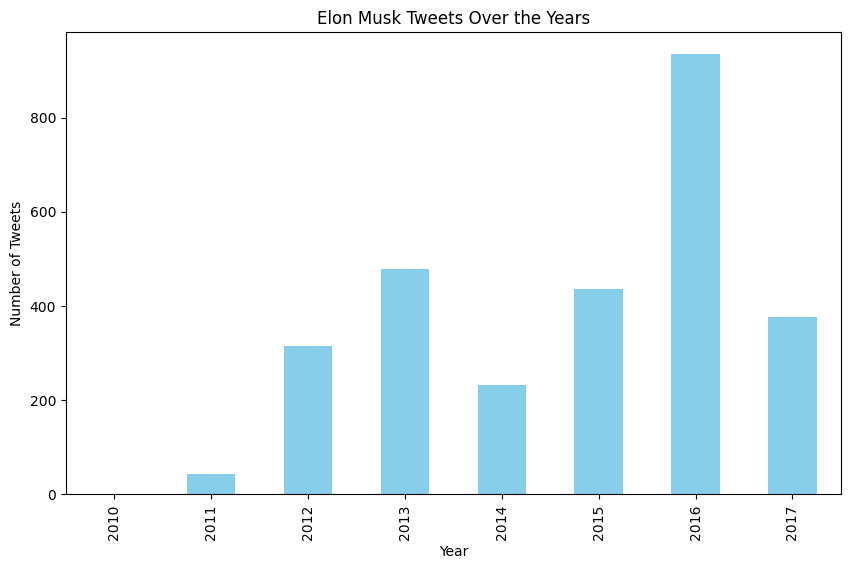

In [72]:
plt.figure(figsize=(10, 6))
tweets_per_year.plot(kind='bar', color='skyblue')
plt.title('Elon Musk Tweets Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.show()

### What conclusion can we infer from this bar chart?

The results indicate a significant increase in Musk's tweet volume in 2016. This is likely attributed to substantial progress made by Musk's companies in various aspects. This surge in tweet activity suggests active promotion and engagement on Musk's part. For instance, notable events include:

- Tesla's official launch of the new electric car, the Model 3, in July 2016.
- The completion of Tesla's acquisition of solar energy company SolarCity in November 2016.
- SpaceX's successful vertical landing of the Falcon 9 rocket.
- Introduction of the ambitious 'Interplanetary Spaceship'.